In [94]:
import pandas as pd

In [95]:
data=pd.read_csv('dataset.csv')

In [96]:
data.head()

,RowNumber,variable1,variable2,variable3,result
0,1,418,11,D,29172
1,2,266,82,B,22968
2,3,905,46,D,64668
3,4,629,59,C,46096
4,5,193,53,B,16236


In [97]:
x = data.iloc[:,1:4]
y = data.iloc[:,4]
print(y)
variable =pd.get_dummies(x['variable3'],drop_first=True)
print(variable)
variable.head()

0       29172
1       22968
2       64668
3       46096
4       16236
        ...  
3995    17748
3996    14625
3997    58344
3998    15164
3999    15378
Name: result, Length: 4000, dtype: int64
      B  C  D
0     0  0  1
1     1  0  0
2     0  0  1
3     0  1  0
4     1  0  0
...  .. .. ..
3995  0  0  1
3996  0  0  0
3997  1  0  0
3998  0  0  1
3999  1  0  0

[4000 rows x 3 columns]


,B,C,D
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,1,0,0


In [98]:
x=x.drop(['variable3'],axis=1)
x.head()

,variable1,variable2
0,418,11
1,266,82
2,905,46
3,629,59
4,193,53


In [99]:
x=pd.concat([x,variable],axis=1)
x.head()

,variable1,variable2,B,C,D
0,418,11,0,0,1
1,266,82,1,0,0
2,905,46,0,0,1
3,629,59,0,1,0
4,193,53,1,0,0


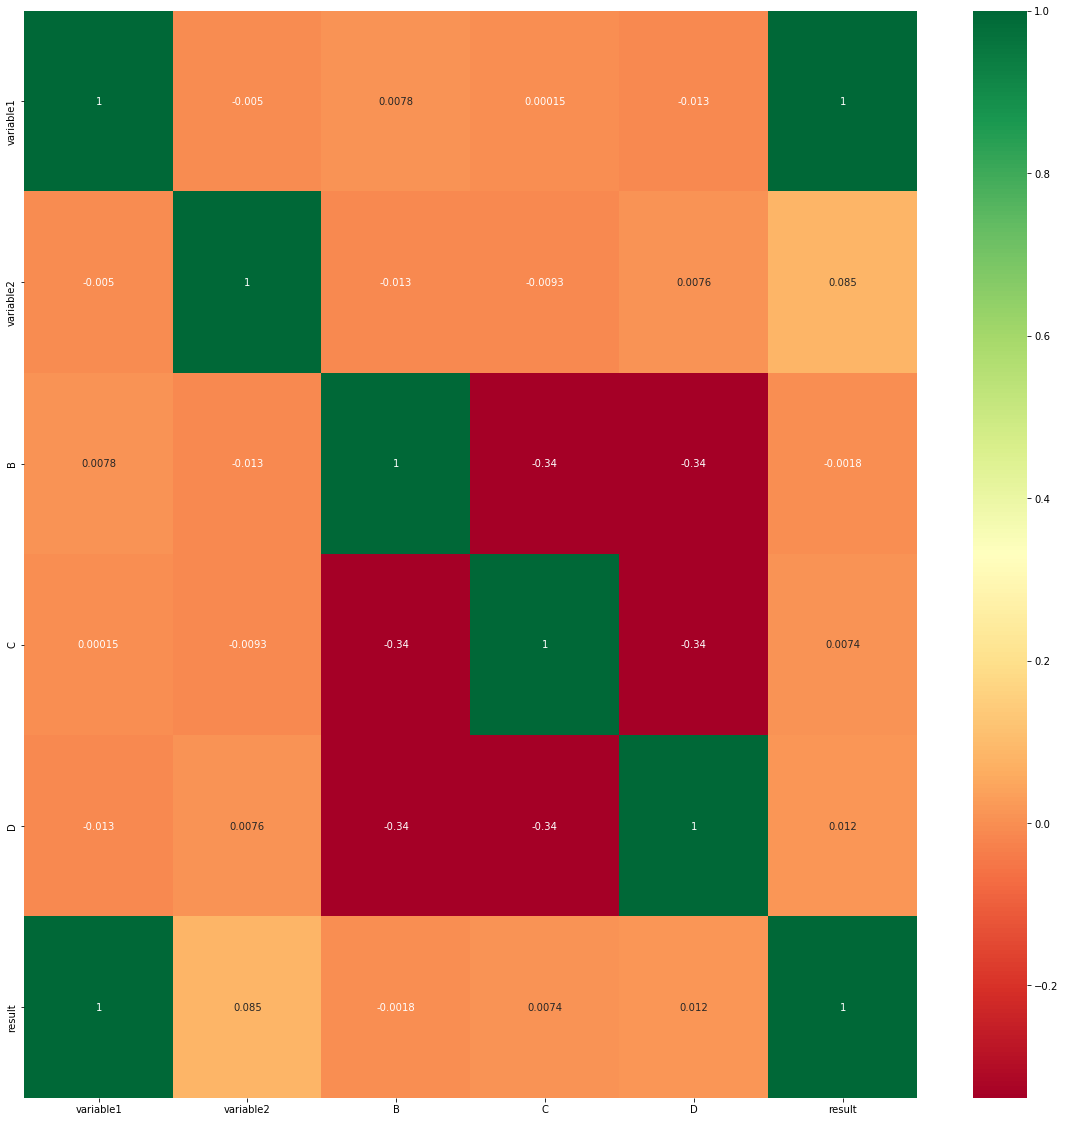

In [100]:
X = pd.concat([x,y], axis=1)
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
g=sns.heatmap(X.corr(),annot=True,cmap="RdYlGn")

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)
print(x_test)

      variable1  variable2  B  C  D
2230        890         77  1  0  0
668         884         48  0  0  1
3616        536         32  0  0  1
2363        477         59  0  0  1
142         173         96  0  1  0
...         ...        ... .. .. ..
1118         65         27  1  0  0
3572        710         17  0  1  0
2482        487         97  0  0  1
643         405         60  0  1  0
299         567         92  0  0  0

[800 rows x 5 columns]


In [102]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
#print(x_train)

In [103]:
from xgboost import XGBRegressor

params={
 "n_estimators"     : [10,100,200,500,800,1000,1500,2000],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
model = XGBRegressor()

In [104]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
grid_search=GridSearchCV(estimator = model,param_grid=params,n_jobs=-1,cv=10,verbose=3)
grid_search.fit(x_train,y_train)


In [105]:
grid_search.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [106]:
#bestParameters = [min_child_weight= 3,
 #max_depth= 15,
 #learning_rate= 0.25,
 #gamma= 0.4,
 #colsample_bytree= 0.7]
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [107]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [108]:
from sklearn.metrics import mean_absolute_error
predictions = model.predict(x_test)
print(x_test)
print(predictions)

      variable1  variable2  B  C  D
2230        890         77  1  0  0
668         884         48  0  0  1
3616        536         32  0  0  1
2363        477         59  0  0  1
142         173         96  0  1  0
...         ...        ... .. .. ..
1118         65         27  1  0  0
3572        710         17  0  1  0
2482        487         97  0  0  1
643         405         60  0  1  0
299         567         92  0  0  0

[800 rows x 5 columns]
[63538.582  63264.18   38590.06   36326.79   17908.32   44731.61
 26901.674  37494.258  52218.996  11808.648  51905.492   7737.1494
 41314.258  61771.79   30873.178  61321.332  42584.195  56514.414
 40434.137   7500.3564 30825.459  63946.91   23023.787  22484.338
 59905.734  37426.617  67348.57   43637.703  30881.396   2508.1553
 60852.867   6453.415  26255.502   2107.011   3440.068  59972.062
 39293.098  69709.414  37963.207  19354.576  30857.082   8634.831
 41488.336  43364.848  14161.262   9567.129  31066.818  40375.617
 42033.67   199

In [109]:
mae = mean_absolute_error(predictions, y_test)
print("the mean absolute error is ", mae)

the mean absolute error is  131.54838500976564


In [110]:
test=pd.read_csv("file.csv")
test = test.iloc[:,1:4]
print(test)

   variable1  variable2 variable3
0        552         96         A
1        552         96         B
2        552         96         C
3        552         96         D


In [111]:
variable2 =pd.get_dummies(test['variable3'],drop_first=True)

print(variable2)

   B  C  D
0  0  0  0
1  1  0  0
2  0  1  0
3  0  0  1


In [112]:
test=test.drop(['variable3'],axis=1)
test=pd.concat([test,variable2],axis=1)
print(test)

   variable1  variable2  B  C  D
0        552         96  0  0  0
1        552         96  1  0  0
2        552         96  0  1  0
3        552         96  0  0  1


In [113]:
prediction2 = model.predict(test)
print(prediction2)

[42155.36  42756.098 43416.207 44133.184]


In [114]:
import pickle

In [115]:
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)

In [116]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [117]:
print(mp.predict(test))

[42155.36  42756.098 43416.207 44133.184]
